# Introduction - Business Problem

After finishing our Computer Science studies at Berkeley, we had a great idea and developed a prototype of a pair of augmented reality glasses with full 5G connectivity, bluetooth and a GPS chipset.
We avoided to include any camera on it (as Google Glasses) and focusing on social media streaming (as the first version of Google ones) or focusing in enterprises (like the latest one).
The reason is that we have identified geolocation as our niche market and we want to focus on it.

In the process of creating the prototype, we did some proof of concepts with different APIs and we observed that there are lot of functionalities we can offer to the users. 
Some examples for which we implemented proof of concepts:

* Strava integration - Strava is the most used APP by runners around the world and after some exploratory testing with the Strava API, we realized our glasses are able to:
    + show to the user very useful data while he or she is running, like: velocity, minutes per mile, distance, heart rate, etc...
    + show them routes previously defined in their user profile or the most popular routes around them
    + show the user "kudos" (cheers) given by their friends in real time


* Google Maps integration - Our glasses are able to integrate with the Google Maps API and we can implement very interesting features:
    + navigate through maps while driving without needing to take the eyes off the road
    + showing interesting/historical points in a city (very useful for tourists)
    + showing interesting restaurants/venues around them when required


* ESPN Sports live stats integration - Our glasses are able to show live sports stats/scores through the ESPN API
    + show live scores for matches of the major leagues in the USA (NFL, NBA, NHL and MLB)
    + show live stats when attending to any event like a Lakers or GSW game
    + show time differences between different cars in a Nascar race


* Disney Parks - As ESPN is part of the Disney emporium, they were impressed by our glasses and ask us to implement as well:
    + navigation through Disney parks, starting with Magic Kingdom in Orland as a proof of concept
    + real time stats on waiting times for the park attractions, so the users can optimize their time in the park


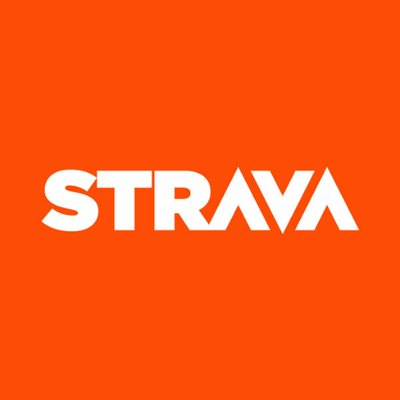 


So, after creating our prototype, we had several appointments with some of the biggest tech companies (including these 3 ones, plus Apple, Microsoft, etc...) in order to show them what our glasses are capable of.
Almost all of them were very interested and after a funding round, some of them decided to invest in our project and create a partnership with us in order to develop the final product and implement lots of features in them.
    

We have launched a brand new start-up company named *Aviato GeoGlasses Inc* and collected 20 millions from our 4 main investors (Apple, Strava, Google, Disney-ESPN) in exchange of 5% of the shares of the company for each one of them.

Now that we have the necessary funding, our next step is to hire 30 engineers, 10 marketing people and additional 10 support staff people (Human Resources, legal advisors, etc...).
However, before doing that, we need to **look for the best place where our offices will be located** and that is the purpose of this work.

In order to define where we think is the best place to locate our offices, we have done an brainstorming session and came to the following conclusion:

* we want to locate our offices in the San Francisco Bay Area
    + there is a lot of personal talent around the bay (graduates from Berkeley, Standford, etc... and engineers working in other tech companies) so we want to attract that people
    + most of our partners are located around this area
    + there are lots of potentials new partners (big technological companies and lots of other startups) around the bay

As we want to accelerate this process and start hiring people and working in the final product as soon as possible, we have decided that we don't want to spend lots of time visiting all the cities around the bay (101 municipalities) searching for the best city/town to locate our offices.

As we have some expertice working as Data scientists, we are going to use our knowledge to reduce the list of possible locations to only a bunch of locations around the bay and we will only need to visit the list of final candidates.

So, we have done another brainstorming session in order to clarify which are the requirements we are looking for.
As a result of that session, we have come to the following requirements for the location:

* we want that our offices are located around the center of the selected city
    + want to feel the "vibe" of the city 
    + avoid ugly and noisy industrial parks
    + avoid residential neighbourhoods where there are no venues around (restaurants, gyms, etc...) 


* we want to locate our office in a town with a reasonable population number
    + want to avoid very busy/turistic cities with a big population like San Francisco
    + at same time we want to avoid very little towns with a very small population
    
    
* we believe our employees will be more creative and efficient if they have interesting venues around
    + we don't believe that working 10 hours without interacting with anybody is a good practice
    + will look for places with restaurants around, so our employees can go for a lunch and socialize
    + will look for places with gyms or other sports facilities around
    + not mandatory, but nice to have, some bars around so our employees can go for a drink after work with other colleagues


* we are looking for cities that have some train or bus station around the city center
    + in order to facilitate our employees to come to the office from other cities around the bay


* in case there are too many cities fulfilling the previous requirements, we will use as a filter having other kinds of venues around:
    + parks, schools, cinemas, shopping malls, etc...
    + can attract more people to our company and maybe they decided to rent/buy an apartment/house and live in the selected city


# Data adquisition

https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area